In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import pandas as pd

from sklearn import preprocessing
import datetime
import seaborn as sns

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree


from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import os

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.style.use('fivethirtyeight')

In [3]:
pd.options.mode.chained_assignment = None 

## Leamos los DF generados

Leemos los archivos por hora:

In [199]:
data_hora = pd.read_csv("./datos_entrenamiento_10-19.csv")


In [210]:
data_hora.head()

,fecha,id_station,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,PM10,RH,TMP,WSP,WDR,PA,UVA,UVB,dia,mes
141236,2012-01-01,ACO,1.2,7.0,31.0,38.0,6.0,NaN,NaN,7.0,113.0,77.0,8.3,1.5,348.0,NaN,NaN,NaN,01,01
141250,2012-01-01,ACO,1.1,5.0,25.0,30.0,10.0,NaN,NaN,8.0,133.0,78.0,8.0,2.1,8.0,NaN,NaN,NaN,01,01
141264,2012-01-01,ACO,1.2,11.0,27.0,38.0,5.0,NaN,NaN,5.0,124.0,82.0,6.7,1.7,348.0,NaN,NaN,NaN,01,01
141278,2012-01-01,ACO,1.2,12.0,21.0,33.0,5.0,NaN,NaN,5.0,113.0,82.0,6.4,0.9,342.0,NaN,NaN,NaN,01,01
141292,2012-01-01,ACO,1.0,5.0,19.0,25.0,4.0,NaN,NaN,6.0,114.0,86.0,5.6,1.3,319.0,NaN,NaN,NaN,01,01


## Visualizaciones    <a class="anchor" id="viz-bullet"></a>

In [44]:
data_hour_merge_24.head()

,UVA_x,UVB_x,PA_x,CO_x,NO_x,NO2_x,NOX_x,O3_x,PM2.5_x,PMCO_x,...,PM10_3_x,PM10_4_x,temp_24,pre_24,RH_24,RH_24_2,UVB_x_1,UVB_x_2,UVB_y_1,UVB_y_2
4,0.0,0.0,0.0,0.5,2.0,9.0,11.0,1.0,5.0,7.0,...,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.5,2.0,9.0,11.0,1.0,5.0,7.0,...,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.5,2.0,9.0,11.0,1.0,5.0,7.0,...,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.5,2.0,9.0,11.0,1.0,5.0,7.0,...,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.5,2.0,9.0,11.0,1.0,5.0,7.0,...,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
data_hour_merge_24.columns

Index(['UVA_x', 'UVB_x', 'PA_x', 'CO_x', 'NO_x', 'NO2_x', 'NOX_x', 'O3_x',
       'PM2.5_x', 'PMCO_x', 'SO2_x', 'RH_x', 'TMP_x', 'WSP_x', 'WDR_x',
       'PM10_x', 'UVA_y', 'UVB_y', 'PA_y', 'CO_y', 'NO_y', 'NO2_y', 'NOX_y',
       'O3_y', 'PM2.5_y', 'PMCO_y', 'SO2_y', 'RH_y', 'TMP_y', 'WSP_y', 'WDR_y',
       'PM10_y', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM2.5', 'PMCO', 'SO2',
       'PM10', 'RH', 'TMP', 'WSP', 'WDR', 'PA', 'UVA', 'UVB', 'dia', 'mes',
       'PM10_mean', 'PM2.5_mean', 'Precip', 'PM10_frcst', 'PM10_max_12',
       'PM10_max_24', 'PM10_max_1', 'PM10_max_2', 'PMCO_1', 'PMCO_2',
       'PMCO_12', 'PMCO_24', 'PM2.5_24', 'PM1_max_2', 'PM1_min_1', 'PM1_min_2',
       'PM1_1', 'PM1_2', 'PM10_1_a', 'PM10_2_a', 'PM10_3_a', 'PM10_4_a',
       'PM10_2_y', 'PM10_3_y', 'PM10_4_y', 'PM10_1_x', 'PM10_2_x', 'PM10_3_x',
       'PM10_4_x', 'temp_24', 'pre_24', 'RH_24', 'RH_24_2', 'UVB_x_1',
       'UVB_x_2', 'UVB_y_1', 'UVB_y_2'],
      dtype='object')

/Users/danielbustillos/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


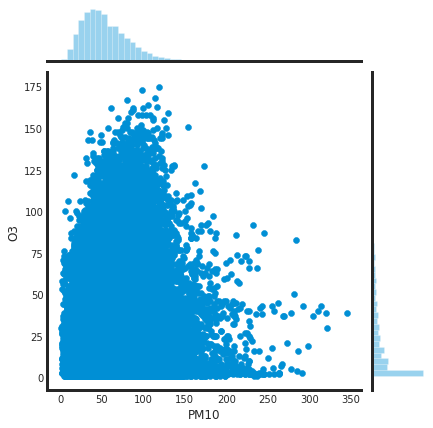

In [40]:
with sns.axes_style('white'):
    sns.jointplot("PM10", "O3", data_hour_merge_24[(data_hour_merge_24.CO >0.1)&(data_hour_merge_24.O3 >0.1)]);
plt.savefig('/Users/danielbustillos/Desktop/pm10-03.png',facecolor="white", edgecolor='white',transparent=True,bbox_inches="tight" ,dpi=500)

KeyboardInterrupt: 

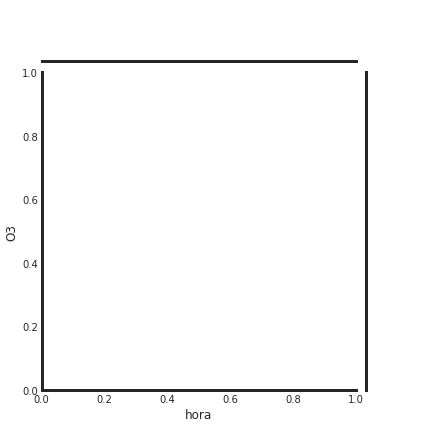

In [41]:
with sns.axes_style('white'):
    sns.jointplot("hora", "O3", data_hour_merge_24, kind='kde',color="g");
plt.savefig('/Users/danielbustillos/Desktop/uva.png',facecolor="white", edgecolor='white',transparent=True,bbox_inches="tight" ,dpi=1000)

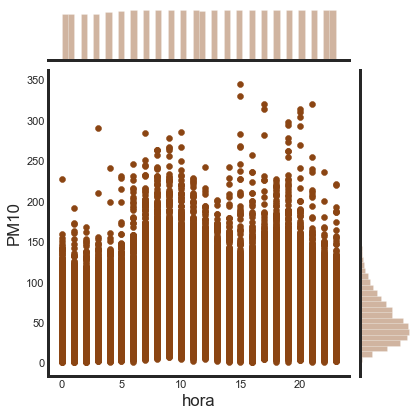

In [423]:
with sns.axes_style('white'):
    sns.jointplot("hora", "PM10", data_hour_merge_24,color="saddlebrown");
    plt.savefig('/Users/danielbustillos/Desktop/hora-PM10.png', dpi=400,background="white")

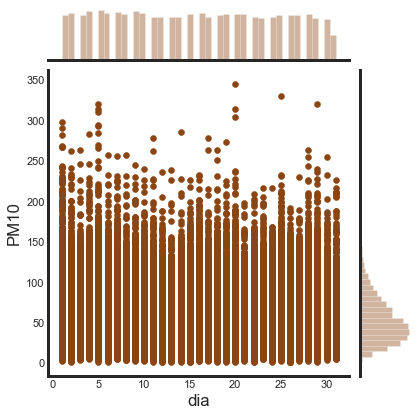

In [422]:
with sns.axes_style('white'):
    sns.jointplot("dia", "PM10", data_hour_merge_24,color="saddlebrown");
    plt.savefig('/Users/danielbustillos/Desktop/dia-PM10.png', dpi=400,background="white")

In [512]:
custom = [(0xD1/0xFF, 0xEC/0xFF, 0x9C/0xFF, 1), (0xF1/0xFF, 0xEB/0xFF, 0xF4/0xFF, 0.5)]
my_cmap = mpl.colors.ListedColormap(custom)
sns.set_palette(custom)

NameError: name 'mpl' is not defined

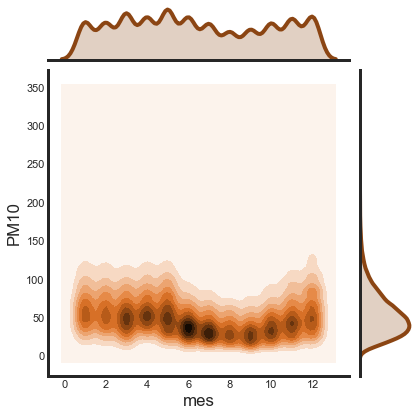

In [515]:
with sns.axes_style('white'):
    sns.jointplot("mes", "PM10", data_hour_merge_24,color="saddlebrown", kind='kde');
    plt.savefig('/Users/danielbustillos/Desktop/mes-PM10-1.png', dpi=200,background="white")

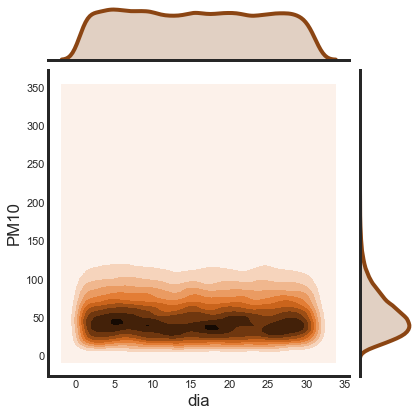

In [516]:
with sns.axes_style('white'):
    sns.jointplot("dia", "PM10", data_hour_merge_24,color="saddlebrown", kind='kde');
    plt.savefig('/Users/danielbustillos/Desktop/dia-PM10-1.png', dpi=200,background="white")

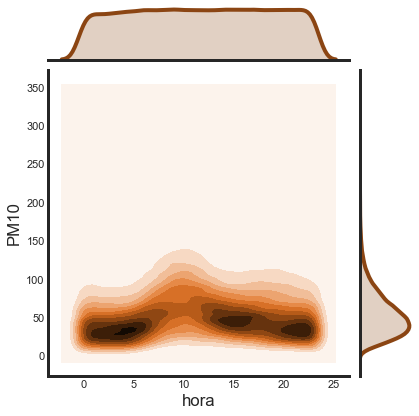

In [517]:
with sns.axes_style('white'):
    sns.jointplot("hora", "PM10", data_hour_merge_24,color="saddlebrown", kind='kde');
    plt.savefig('/Users/danielbustillos/Desktop/hora-PM10-1.png', dpi=200,background="white")

/Users/danielbustillos/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


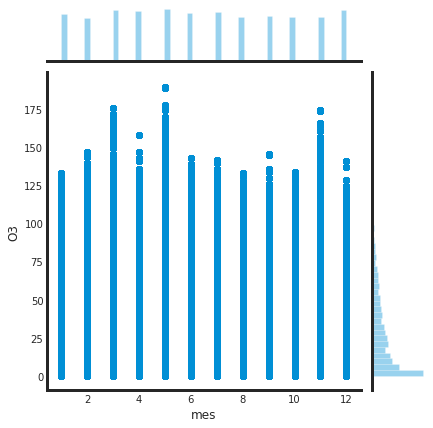

In [46]:
with sns.axes_style('white'):
    sns.jointplot("mes", "O3", data_hour_merge_24);
 #   plt.savefig('/Users/danielbustillos/Desktop/mes-o3.png', dpi=400,background="white")

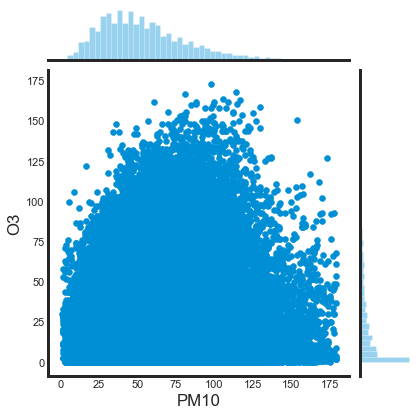

In [588]:
with sns.axes_style('white'):
    sns.jointplot("PM10", "O3", data_hour_merge_24[(data_hour_merge_24.PM10 <180) & (data_hour_merge_24.O3 <175)]);
    plt.savefig('/Users/danielbustillos/Desktop/mes-o3-1.png', dpi=400,background="white")

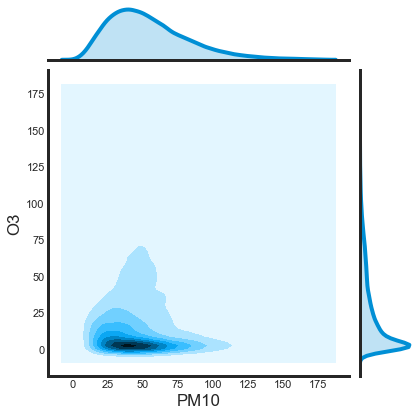

In [583]:
with sns.axes_style('white'):
    sns.jointplot("PM10", "O3", data_hour_merge_24[(data_hour_merge_24.PM10 <180) & (data_hour_merge_24.O3 <175)], kind='kde');


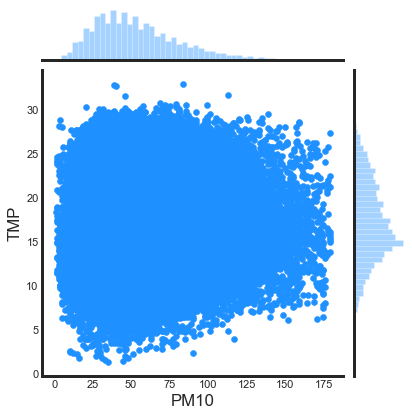

In [586]:
with sns.axes_style('white'):
    sns.jointplot("PM10", "TMP", data_hour_merge_24[(data_hour_merge_24.PM10 <180) & (data_hour_merge_24.TMP >1)],color="dodgerblue");
    plt.savefig('/Users/danielbustillos/Desktop/temp-o3.png', dpi=400,background="white")

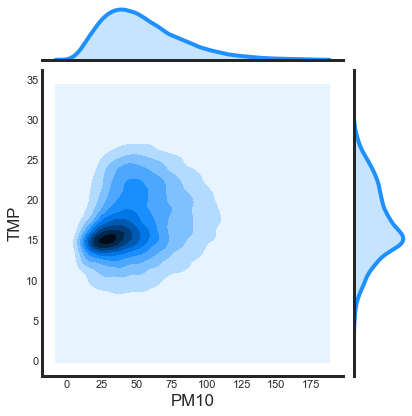

In [584]:
with sns.axes_style('white'):
    sns.jointplot("PM10", "TMP", data_hour_merge_24[(data_hour_merge_24.PM10 <180) & (data_hour_merge_24.TMP >1)], kind='kde',color="dodgerblue");
    plt.savefig('/Users/danielbustillos/Desktop/temp-o3-1.png', dpi=400,background="white")

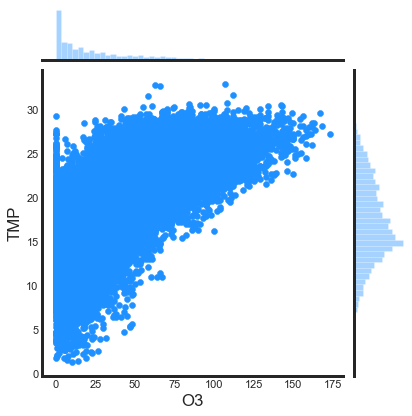

In [590]:
with sns.axes_style('white'):
    sns.jointplot("O3", "TMP", data_hour_merge_24[(data_hour_merge_24.PM10 <180) & (data_hour_merge_24.TMP >1)],color="dodgerblue");
    plt.savefig('/Users/danielbustillos/Desktop/temp-o3-1.png', dpi=400,background="white")

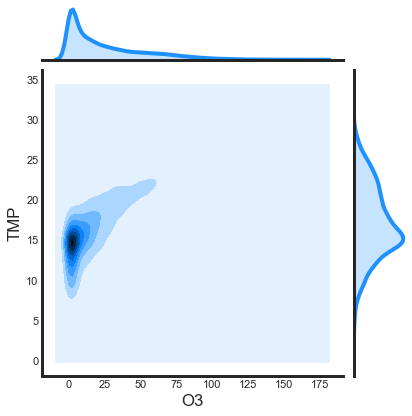

In [589]:
with sns.axes_style('white'):
    sns.jointplot("O3", "TMP", data_hour_merge_24[(data_hour_merge_24.PM10 <180) & (data_hour_merge_24.TMP >1)], kind='kde',color="dodgerblue");
    plt.savefig('/Users/danielbustillos/Desktop/temp-o3-1.png', dpi=400,background="white")

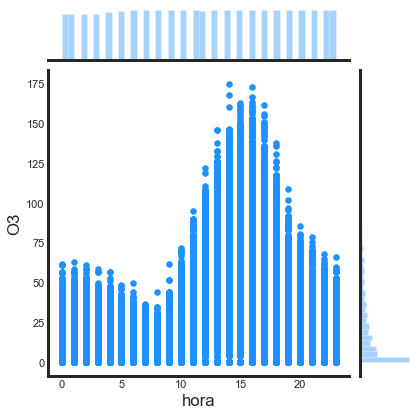

In [418]:
with sns.axes_style('white'):
    sns.jointplot("hora", "O3", data_hour_merge_24,color="dodgerblue");
plt.savefig('/Users/danielbustillos/Desktop/hora-o3.png', dpi=400,background="white")

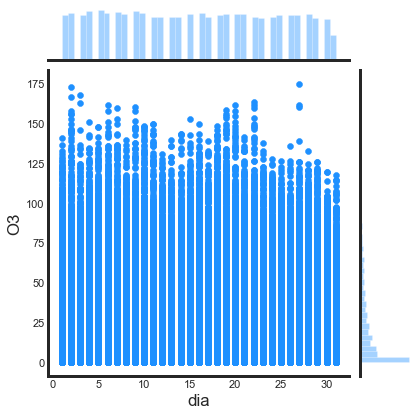

In [421]:
with sns.axes_style('white'):
    sns.jointplot("dia", "O3", data_hour_merge_24,color="dodgerblue");
plt.savefig('/Users/danielbustillos/Desktop/dia-o3.png', dpi=400,background="white")

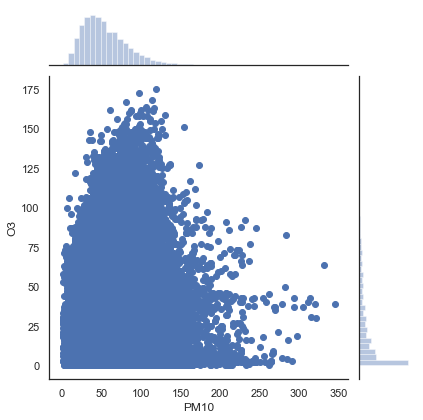

In [185]:
with sns.axes_style('white'):
    sns.jointplot("PM10", "O3", data_hour_merge_24);
    plt.savefig('/Users/danielbustillos/Desktop/pm10-o3.png', dpi=400,background="white")

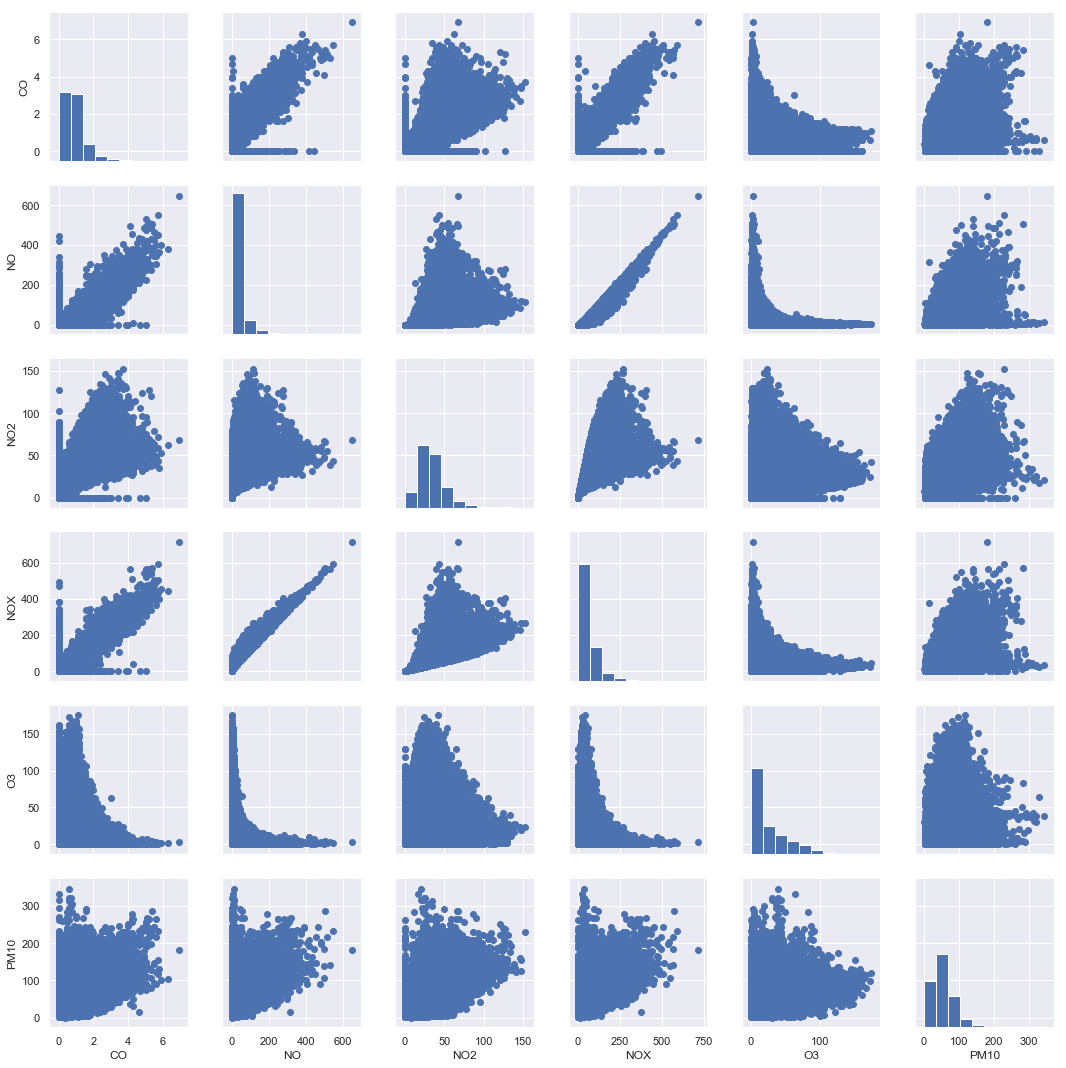

In [180]:
g = sns.PairGrid(data_hour_merge_24, vars=['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10'], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

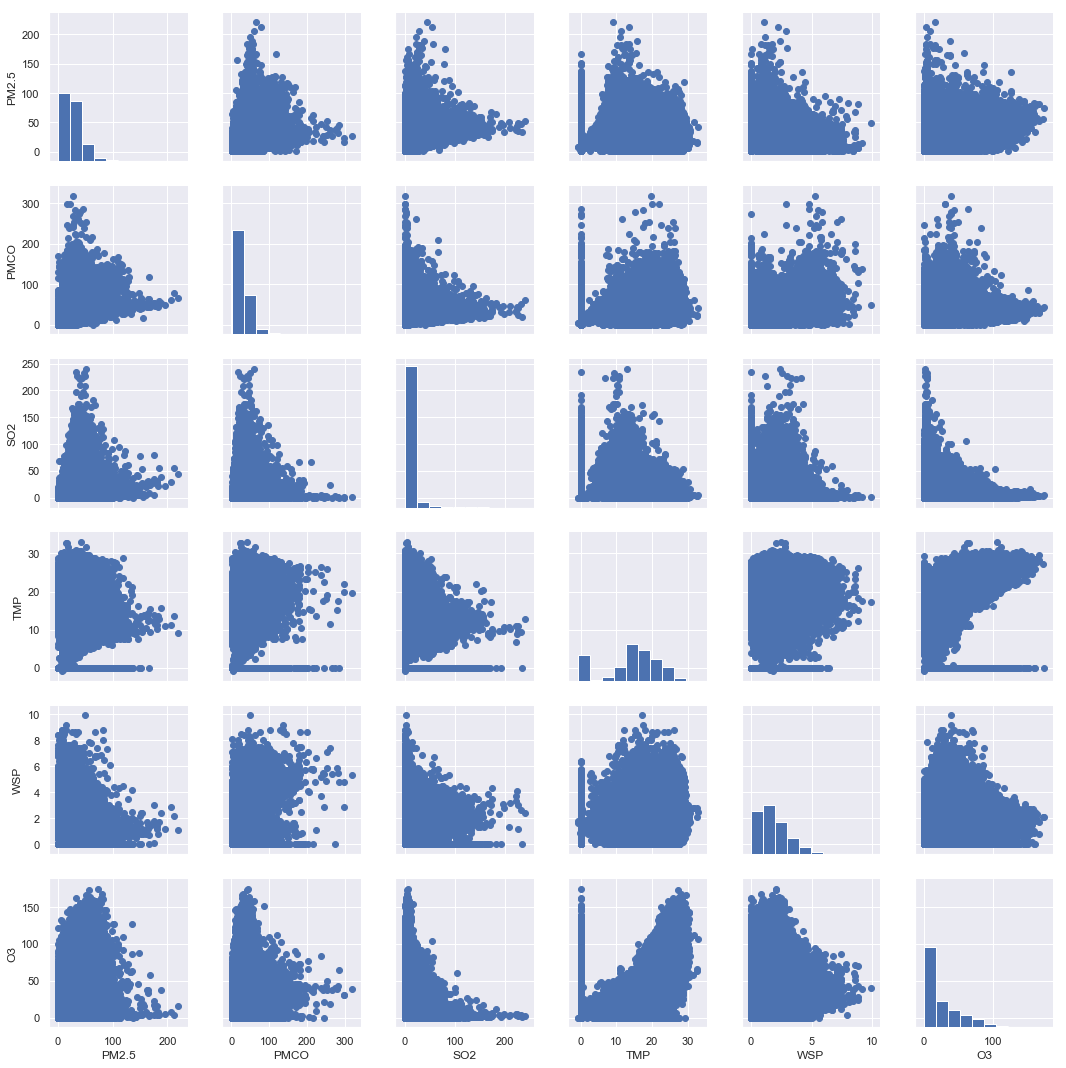

In [181]:
g = sns.PairGrid(data_hour_merge_24, vars=['PM2.5', 'PMCO', 'SO2','TMP', 'WSP', 'O3'], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

In [184]:
data_hour_merge_24.columns

Index(['fecha', 'id_station', 'hora', 'UVA_x', 'UVB_x', 'PA_x', 'CO_x', 'NO_x',
       'NO2_x', 'NOX_x', 'O3_x', 'PM2.5_x', 'PMCO_x', 'SO2_x', 'RH_x', 'TMP_x',
       'WSP_x', 'WDR_x', 'PM10_x', 'UVA_y', 'UVB_y', 'PA_y', 'CO_y', 'NO_y',
       'NO2_y', 'NOX_y', 'O3_y', 'PM2.5_y', 'PMCO_y', 'SO2_y', 'RH_y', 'TMP_y',
       'WSP_y', 'WDR_y', 'PM10_y', 'dia', 'mes', 'UVA', 'UVB', 'PA', 'CO',
       'NO', 'NO2', 'NOX', 'O3', 'PM2.5', 'PMCO', 'SO2', 'RH', 'TMP', 'WSP',
       'WDR', 'PM10', 'PM10_mean', 'PM2.5_mean', 'Precip', 'PM10_frcst',
       'PM10_promedi', 'PM10_1_a', 'PM10_2_a', 'PM10_3_a', 'PM10_4_a',
       'PM10_2_y', 'PM10_3_y', 'PM10_4_y', 'PM10_1_x', 'PM10_2_x', 'PM10_3_x',
       'PM10_4_x', 'temp_24', 'pre_24', 'RH_24', 'RH_24_2', 'UVB_x_1',
       'UVB_x_2', 'UVB_y_1', 'UVB_y_2'],
      dtype='object')

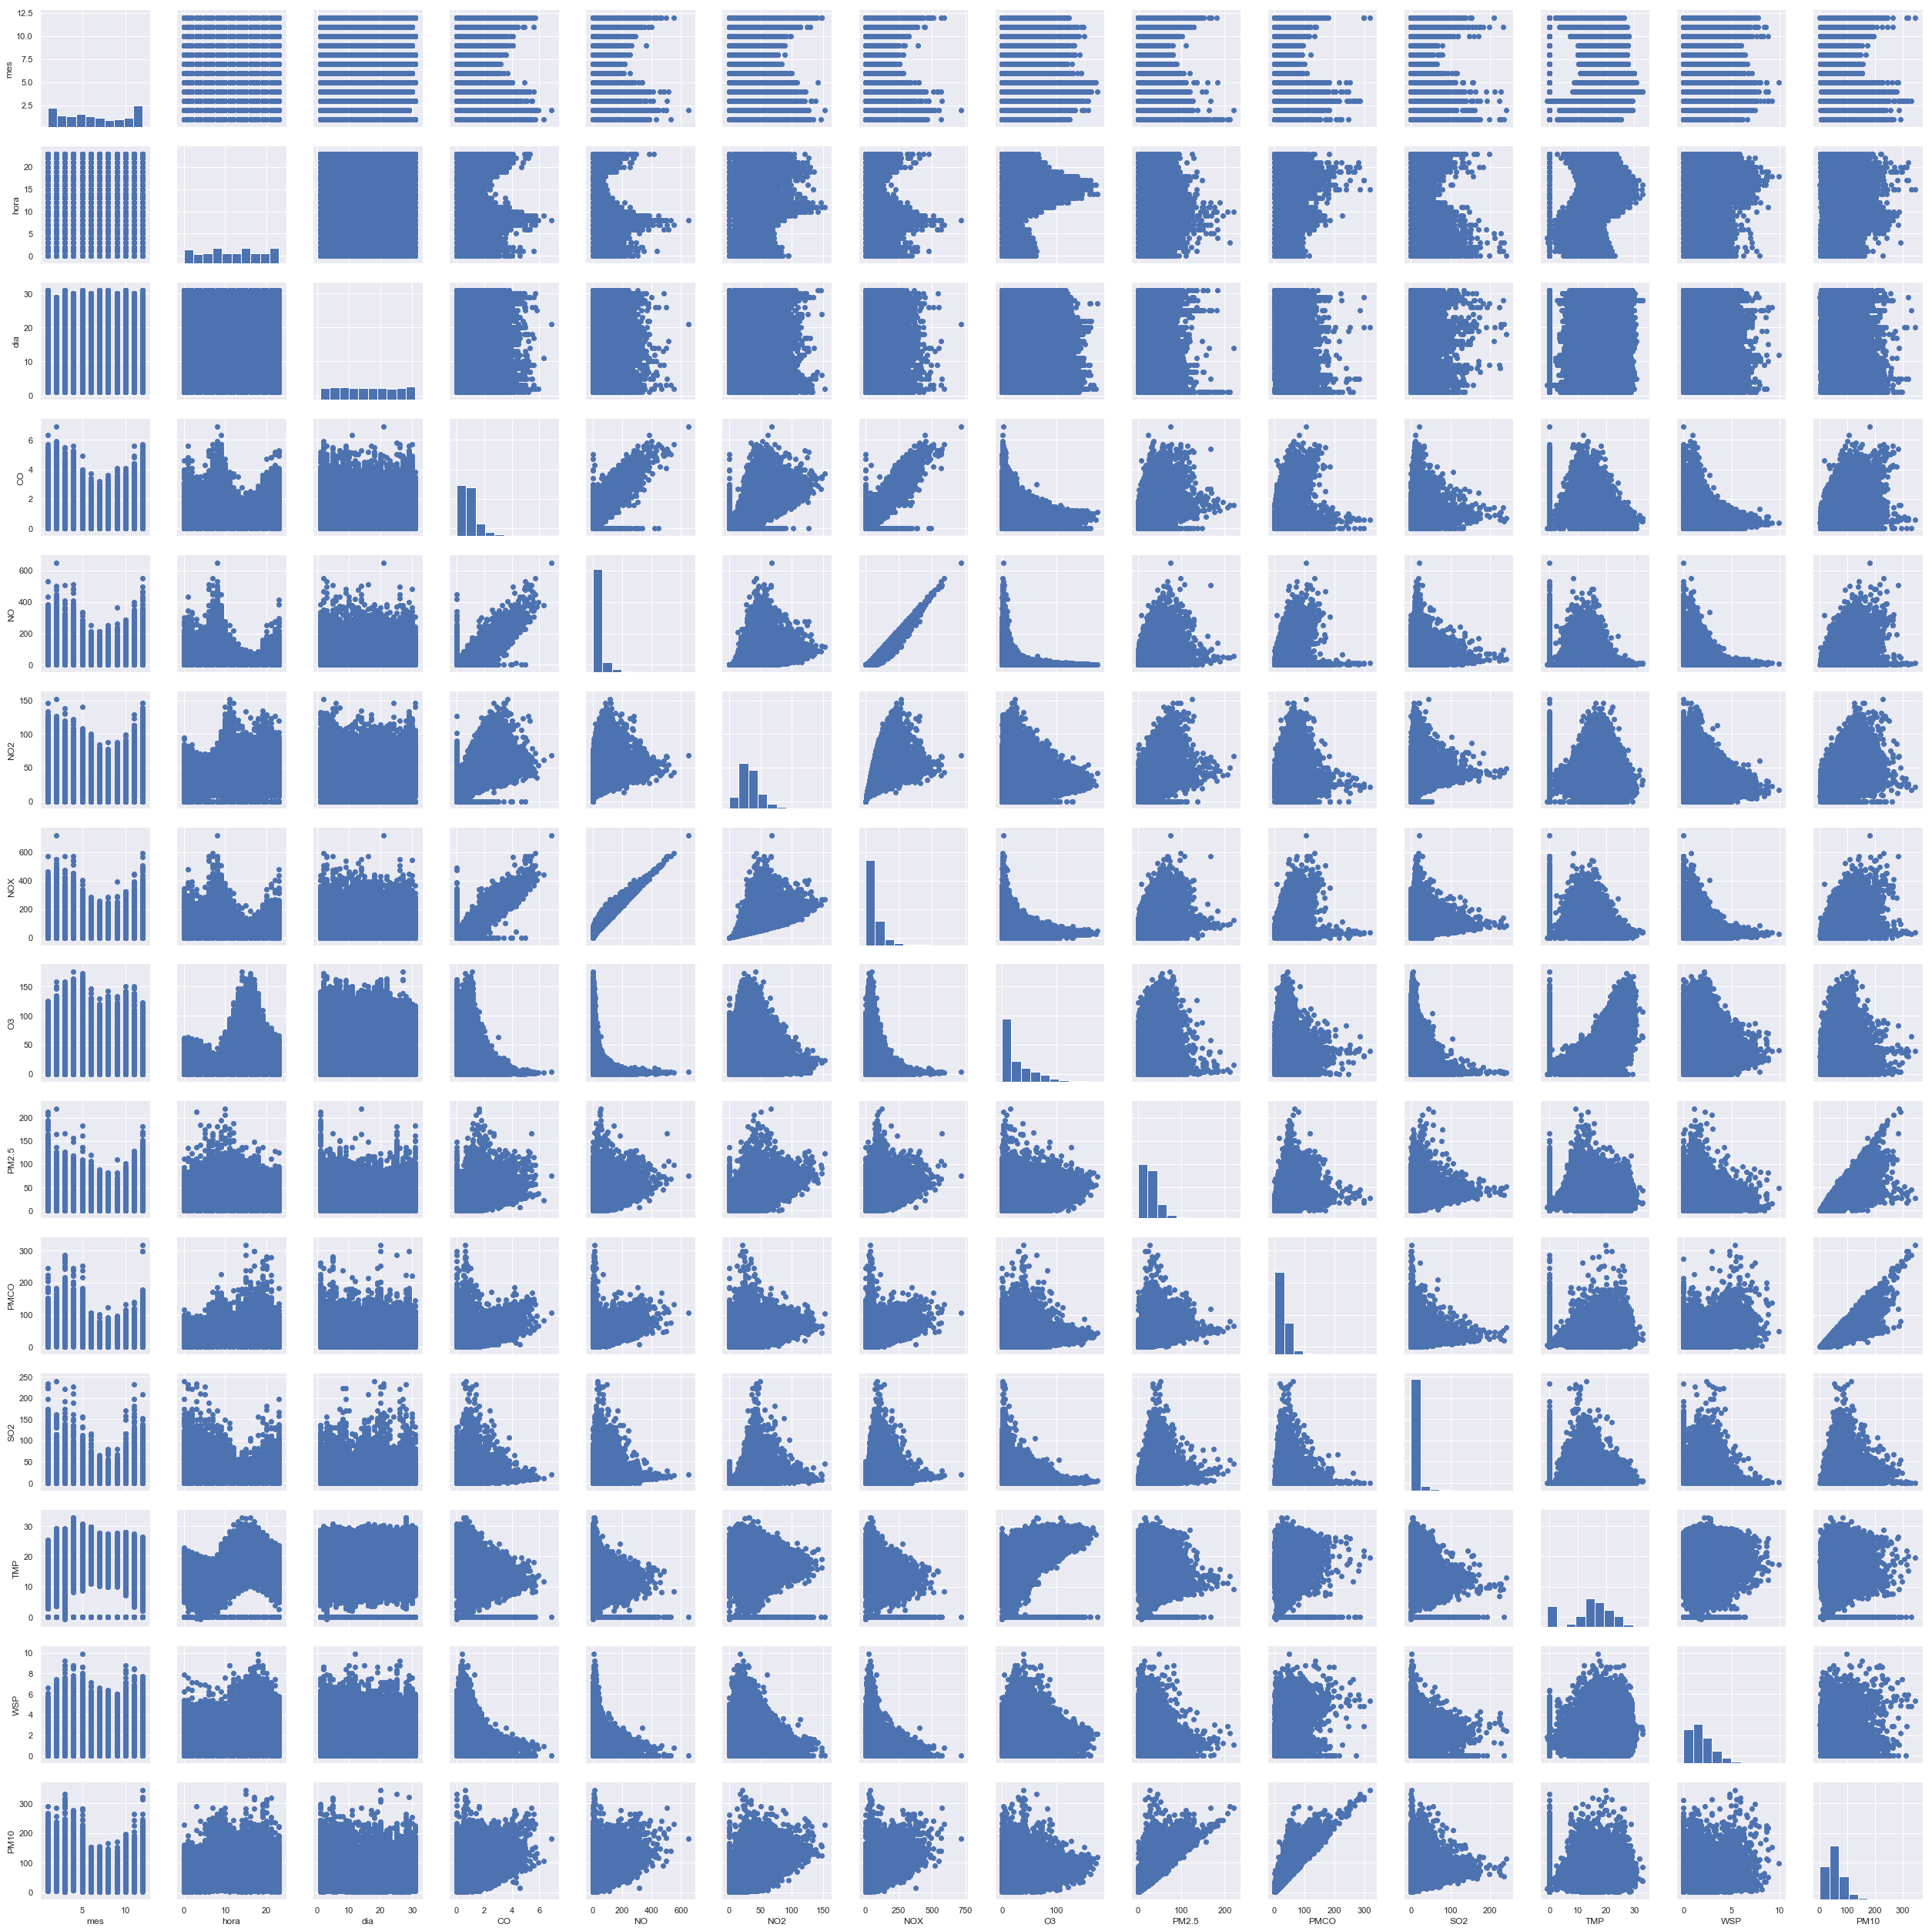

In [183]:
g = sns.PairGrid(data_hour_merge_24, vars=['mes', 'hora',"dia",'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM2.5', 'PMCO', 'SO2','TMP', 'WSP', 'PM10',"], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

In [ ]:
## Detalle

In [179]:
g = sns.PairGrid(data_18, vars=['RH',
       'TMP', 'WSP', 'PM10'], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

NameError: name 'data_18' is not defined